In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import os

path = '/kaggle/input/marvel-superheroes/'

stats_df = pd.read_csv(os.path.join(path, 'charcters_stats.csv'))

In [6]:
stats_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [7]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


In [23]:
stats_df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


## Core Mission - 1: Stat 수치의 합이 가장 큰 캐릭터 찾기

* Alignment는 good, neutral, bad 등의 범주형 값인것으로 보아 좋은 히어로인지 빌런인지 등을 구분하는 척도같다.
* Total 칼럼을 기준으로 정렬하면 가장 스탯이 좋은 히어로를 찾을 수 있다.

In [8]:
stats_df.sort_values(by='Total', ascending=False)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
...,...,...,...,...,...,...,...,...,...
462,Renata Soliz,good,1,1,1,1,0,1,5
137,Captain Mar-vell,good,1,1,1,1,0,1,5
136,Captain Epic,good,1,1,1,1,0,1,5
466,Ripcord,good,1,1,1,1,0,1,5


In [15]:
answer = stats_df.sort_values(by='Total', ascending=False)['Name'].iloc[0]

In [16]:
print(f'가장 스탯이 높은 캐릭터 : {answer}')

가장 스탯이 높은 캐릭터 : Martian Manhunter


---

## Core Mission-2: 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알아보기

In [38]:
type_df = stats_df[(stats_df['Alignment'] == 'good') | (stats_df['Alignment'] == 'bad')]

### 종합 능력치 수치 분포

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  """Entry point for launching an IPython kernel.


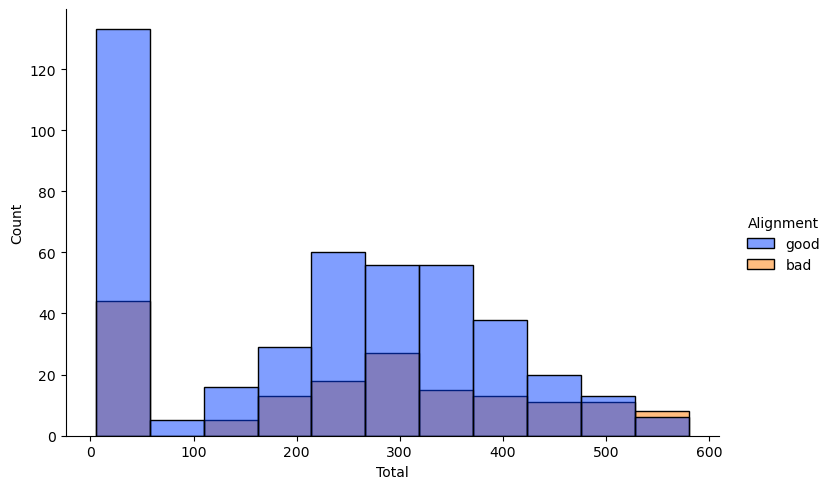

In [40]:
sns.displot(data=type_df, x='Total', hue='Alignment', kind='hist', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  """Entry point for launching an IPython kernel.


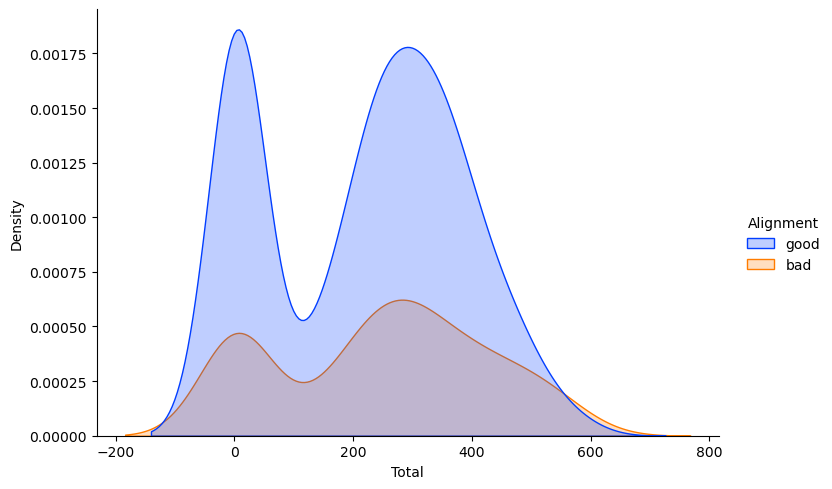

In [39]:
fig = sns.displot(data=type_df, x='Total', hue='Alignment', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

* stat 총합이 50도 안되는 영웅들이 많다.
* 좋은 영웅이 나쁜 영웅보다 대체로 더 많다.

In [48]:
cols = list(type_df.columns[2:]) # 조사할 칼럼들

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  after removing the cwd from sys.path.
/opt/conda

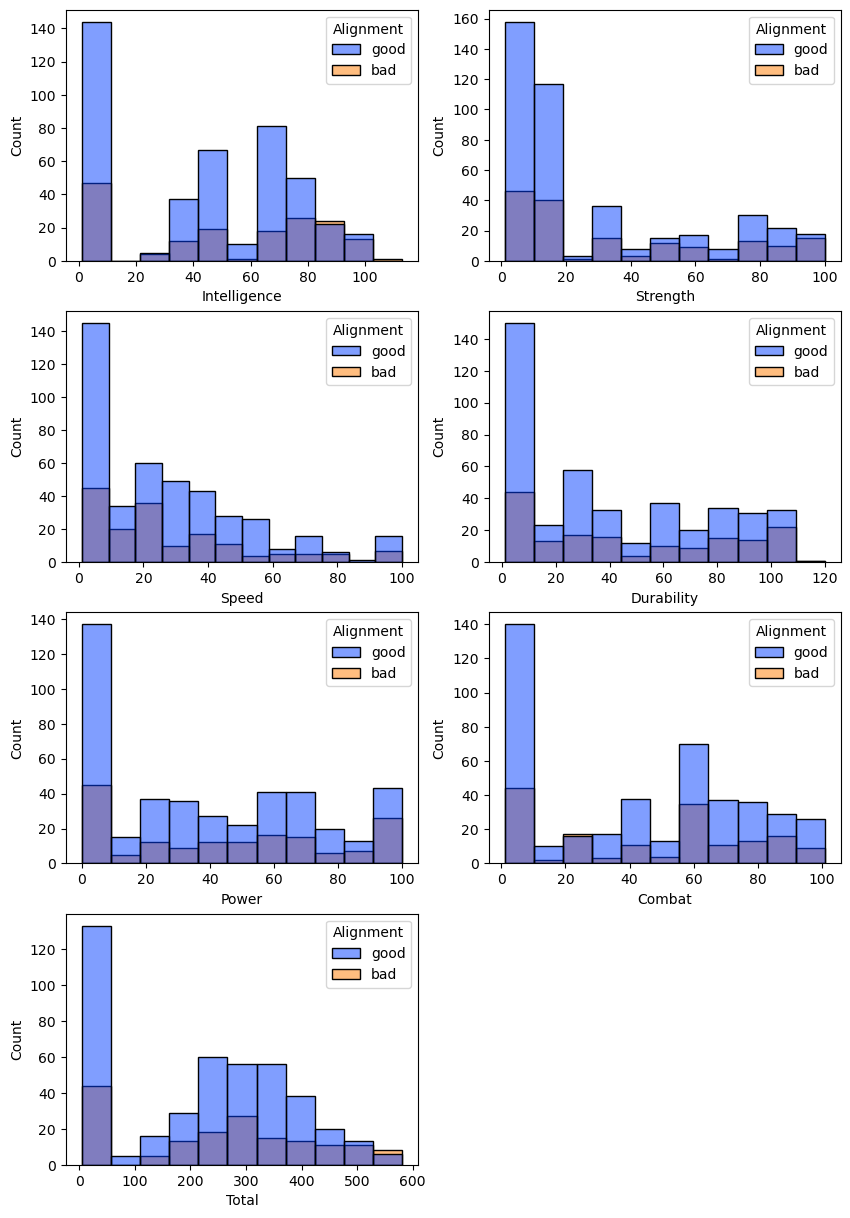

In [63]:
f = plt.figure(figsize=(10, 15))
for i in range(len(cols)):
    f.add_subplot(4, 2, i+1)
    sns.histplot(data=type_df, x=cols[i], hue='Alignment',palette=sns.color_palette('bright')[:3])
plt.show()